Installing Kagglehub and downloading dataset via Kaggle API

In [1]:
!pip install kagglehub
import kagglehub

# Download latest version
path = kagglehub.dataset_download("vipoooool/new-plant-diseases-dataset")

print("Path to dataset files:", path)

/Users/yannik/anaconda3/envs/keras_env/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: /Users/yannik/.cache/kagglehub/datasets/vipoooool/new-plant-diseases-dataset/versions/2


Defining the paths to training, validation, and testing folder. Counting the number of folders and files.

In [2]:
import os

# Define the dataset path
root_folder = "/Users/yannik/.cache/kagglehub/datasets/vipoooool/new-plant-diseases-dataset/versions/2"

data_dir = os.path.join(root_folder, 'new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/')

test_path = os.path.join(root_folder, 'test/test')
train_path = os.path.join(data_dir, 'train')
valid_path = os.path.join(data_dir, 'valid')

# Count the number of folders in a directory
def count_folders(path):
    if os.path.exists(path):
        return len([d for d in os.listdir(path) if os.path.isdir(os.path.join(path, d))])
    else:
        print(f"Path does not exist: {path}")
        return 0

# Count the number of files in a directory
def count_files(path):
    if os.path.exists(path):
        return len([f for f in os.listdir(path) if os.path.isfile(os.path.join(path, f))])
    else:
        print(f"Path does not exist: {path}")
        return 0

# Function to count files in each folder of a given directory
def count_files_in_folders(path):
    if not os.path.exists(path):
        print(f"Path does not exist: {path}")
        return {}

    folder_file_counts = {}
    for folder in os.listdir(path):
        folder_path = os.path.join(path, folder)
        if os.path.isdir(folder_path):
            file_count = len([f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))])
            folder_file_counts[folder] = file_count

    return folder_file_counts

# Print counts
print(f"Number of folders in train_path: {count_folders(train_path)}")
print(f"Number of folders in valid_path: {count_folders(valid_path)}")
print(f"Number of files in test_path: {count_files(test_path)}")
print('-------------------------------------------------------------------')
# Count files in each folder
train_folder_counts = count_files_in_folders(train_path)
valid_folder_counts = count_files_in_folders(valid_path)
# Display results
print("Files in each folder (train_path):")
for folder, count in train_folder_counts.items():
    print(f"{folder}: {count} files")

print("\nFiles in each folder (valid_path):")
for folder, count in valid_folder_counts.items():
    print(f"{folder}: {count} files")

Number of folders in train_path: 38
Number of folders in valid_path: 38
Number of files in test_path: 33
-------------------------------------------------------------------
Files in each folder (train_path):
Strawberry___healthy: 1824 files
Grape___Black_rot: 1888 files
Potato___Early_blight: 1939 files
Blueberry___healthy: 1816 files
Corn_(maize)___healthy: 1859 files
Tomato___Target_Spot: 1827 files
Peach___healthy: 1728 files
Potato___Late_blight: 1939 files
Tomato___Late_blight: 1851 files
Tomato___Tomato_mosaic_virus: 1790 files
Pepper,_bell___healthy: 1988 files
Orange___Haunglongbing_(Citrus_greening): 2010 files
Tomato___Leaf_Mold: 1882 files
Grape___Leaf_blight_(Isariopsis_Leaf_Spot): 1722 files
Cherry_(including_sour)___Powdery_mildew: 1683 files
Apple___Cedar_apple_rust: 1760 files
Tomato___Bacterial_spot: 1702 files
Grape___healthy: 1692 files
Tomato___Early_blight: 1920 files
Corn_(maize)___Common_rust_: 1907 files
Grape___Esca_(Black_Measles): 1920 files
Raspberry___healt

In [5]:
!pip install pandas numpy matplotlib seaborn tensorflow

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
INFO: pip is looking at multiple versions of tensorflow to determine which version is compatible with other requirements. This could take a while.
  Using cached typing_extensions-4.5.0-py3-none-any.whl.metadata (8.5 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 3.1 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 3.8 MB/s eta 0:00:00a 0:00:01
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 4.5 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 4.3 MB/s eta 0:00:00a 0:00:01
Using cached typing_extensions-4.5.0-py3-none-any.whl (27 kB)
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.12.2
    Uninstalling typing_extensions-4.12.2:
      Successfully uninstalled typing_extensions-4.12.2
ERROR: pip's dependency resolver does not currently take in

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [4]:
import tensorflow as tf
print("GPU Available:", tf.test.is_gpu_available())
print(tf.config.list_physical_devices('GPU'))

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
GPU Available: True
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


2024-12-04 16:25:02.719533: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2024-12-04 16:25:02.719555: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2024-12-04 16:25:02.719562: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2024-12-04 16:25:02.720127: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-12-04 16:25:02.720417: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [5]:
import PIL
import scipy

print(PIL.__version__)
print(scipy.__version__)

10.4.0
1.10.1


In [6]:
# Define the image generators for the training and validation set

batch_size = 32
num_classes = 38

train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical',
    shuffle=True)  # randomize the order of the samples to avoid overfitting

validation_generator = validation_datagen.flow_from_directory(
    valid_path,
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical',
    shuffle=True)  # randomize the order of the samples to avoid overfitting

# Define the CNN model which adapts the architecture of a LeNet model

model_lenet = Sequential([
    Conv2D(32, (5, 5), activation='relu', input_shape=(256, 256, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (5, 5), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

model_lenet.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Training the model on my GPU cores

with tf.device('/device:GPU:0'):
    model_lenet.fit(train_generator,
            steps_per_epoch=train_generator.samples // batch_size,
            epochs=20,
            validation_data=validation_generator,
            validation_steps=validation_generator.samples // batch_size)

Found 70295 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.


2024-12-04 16:25:12.131921: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-12-04 16:25:12.131953: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Epoch 1/20


2024-12-04 16:25:12.777027: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2196/2196 [==============================] - ETA: 0s - loss: 2.8029 - accuracy: 0.5221

2024-12-04 16:33:39.727968: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2196/2196 [==============================] - 552s 250ms/step - loss: 2.8029 - accuracy: 0.5221 - val_loss: 5.2035 - val_accuracy: 0.6523
Epoch 2/20
2196/2196 [==============================] - 610s 278ms/step - loss: 41.3363 - accuracy: 0.6467 - val_loss: 65.2788 - val_accuracy: 0.7595
Epoch 3/20
2196/2196 [==============================] - 672s 306ms/step - loss: 284.3245 - accuracy: 0.7388 - val_loss: 326.8709 - val_accuracy: 0.8148
Epoch 4/20
2196/2196 [==============================] - 700s 319ms/step - loss: 1331.1671 - accuracy: 0.7788 - val_loss: 1286.6937 - val_accuracy: 0.8439
Epoch 5/20
2196/2196 [==============================] - 702s 319ms/step - loss: 3279.4695 - accuracy: 0.8144 - val_loss: 2715.9570 - val_accuracy: 0.8692
Epoch 6/20
2196/2196 [==============================] - 720s 328ms/step - loss: 7451.3101 - accuracy: 0.8275 - val_loss: 6738.3057 - val_accuracy: 0.8682
Epoch 7/20
2196/2196 [==============================] - 707s 322ms/step - loss: 14052.9854 - accura

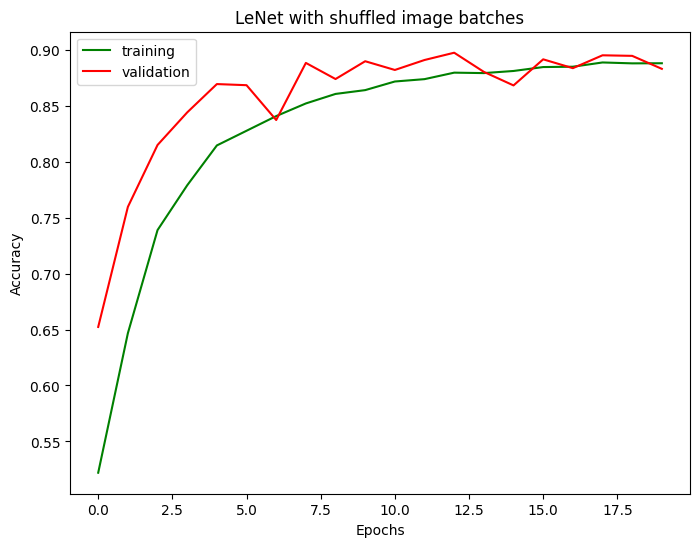

In [10]:
# I forgot to save the history of the fitting process in a history object
# I will manually copy&paste the training and validation accuracy from the verbose output above

train_acc = [0.5221, 0.6467, 0.7388, 0.7788, 0.8144, 0.8275, 0.8406, 0.8519, 0.8604, 0.8638, 0.8715, 0.8736, 0.8794, 0.8790, 0.8809, 0.8844, 0.8847, 0.8885, 0.8877, 0.8878]
val_acc = [0.6523, 0.7595, 0.8148, 0.8439, 0.8692, 0.8682, 0.8371, 0.8881, 0.8737, 0.8896, 0.8818, 0.8907, 0.8972, 0.8801, 0.8680, 0.8913, 0.8834, 0.8949, 0.8944, 0.8828]

plt.figure(figsize=(8, 6))
plt.plot(np.arange(20), train_acc, c="g", label="training")
plt.plot(np.arange(20), val_acc, c="r", label="validation")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("LeNet with shuffled image batches")
plt.legend()
plt.show()

In [12]:
model_lenet.save("lenet_model_shuffled_batches.h5")

/Users/yannik/anaconda3/envs/keras_env/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
